<a href="https://colab.research.google.com/github/woo2201/sampleCases/blob/reservior/HomeCreditDefault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/dataset/home-credit-default-risk/

/content/drive/MyDrive/dataset/home-credit-default-risk


In [4]:
pip install pyspark

     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 198 kB 62.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=a1887572e26e3e0404cd5ea70f824c0bf1ec31810d4fabe2114f12e6d5d2440f
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pyspark

# PySpark 맛뵈기

In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Practice").getOrCreate() # first run takes time.

In [10]:
spark

In [12]:
df_spark = spark.read.csv("/content/drive/MyDrive/dataset/home-credit-default-risk/application_train.csv")

In [13]:
df_spark

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string, _c12: string, _c13: string, _c14: string, _c15: string, _c16: string, _c17: string, _c18: string, _c19: string, _c20: string, _c21: string, _c22: string, _c23: string, _c24: string, _c25: string, _c26: string, _c27: string, _c28: string, _c29: string, _c30: string, _c31: string, _c32: string, _c33: string, _c34: string, _c35: string, _c36: string, _c37: string, _c38: string, _c39: string, _c40: string, _c41: string, _c42: string, _c43: string, _c44: string, _c45: string, _c46: string, _c47: string, _c48: string, _c49: string, _c50: string, _c51: string, _c52: string, _c53: string, _c54: string, _c55: string, _c56: string, _c57: string, _c58: string, _c59: string, _c60: string, _c61: string, _c62: string, _c63: string, _c64: string, _c65: string, _c66: string, _c67: string, _c68: string, _c69: string, _c70: string, _c71: 

In [14]:
spark.read.option('header', 'true').csv("/content/drive/MyDrive/dataset/home-credit-default-risk/application_train.csv")

DataFrame[SK_ID_CURR: string, TARGET: string, NAME_CONTRACT_TYPE: string, CODE_GENDER: string, FLAG_OWN_CAR: string, FLAG_OWN_REALTY: string, CNT_CHILDREN: string, AMT_INCOME_TOTAL: string, AMT_CREDIT: string, AMT_ANNUITY: string, AMT_GOODS_PRICE: string, NAME_TYPE_SUITE: string, NAME_INCOME_TYPE: string, NAME_EDUCATION_TYPE: string, NAME_FAMILY_STATUS: string, NAME_HOUSING_TYPE: string, REGION_POPULATION_RELATIVE: string, DAYS_BIRTH: string, DAYS_EMPLOYED: string, DAYS_REGISTRATION: string, DAYS_ID_PUBLISH: string, OWN_CAR_AGE: string, FLAG_MOBIL: string, FLAG_EMP_PHONE: string, FLAG_WORK_PHONE: string, FLAG_CONT_MOBILE: string, FLAG_PHONE: string, FLAG_EMAIL: string, OCCUPATION_TYPE: string, CNT_FAM_MEMBERS: string, REGION_RATING_CLIENT: string, REGION_RATING_CLIENT_W_CITY: string, WEEKDAY_APPR_PROCESS_START: string, HOUR_APPR_PROCESS_START: string, REG_REGION_NOT_LIVE_REGION: string, REG_REGION_NOT_WORK_REGION: string, LIVE_REGION_NOT_WORK_REGION: string, REG_CITY_NOT_LIVE_CITY: str

In [16]:
df_spark = spark.read.option('header', 'true').csv("/content/drive/MyDrive/dataset/home-credit-default-risk/application_train.csv")

In [25]:
df_spark = spark.read.csv("/content/drive/MyDrive/dataset/home-credit-default-risk/application_train.csv", header = True, inferSchema = True)

In [17]:
df_spark.show()

+----------+------+------------------+-----------+------------+---------------+------------+----------------+----------+-----------+---------------+---------------+--------------------+--------------------+--------------------+-----------------+--------------------------+----------+-------------+-----------------+---------------+-----------+----------+--------------+---------------+----------------+----------+----------+---------------+---------------+--------------------+---------------------------+--------------------------+-----------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+--------------------+-------------------+-------------------+-------------------+--------------+----------------+---------------------------+------------------+--------------+-------------+-------------+-------------+-------------+------------+--------------------+--------------+------------

In [18]:
type(df_spark)

pyspark.sql.dataframe.DataFrame

In [19]:
df_spark.head(3)

[Row(SK_ID_CURR='100002', TARGET='1', NAME_CONTRACT_TYPE='Cash loans', CODE_GENDER='M', FLAG_OWN_CAR='N', FLAG_OWN_REALTY='Y', CNT_CHILDREN='0', AMT_INCOME_TOTAL='202500.0', AMT_CREDIT='406597.5', AMT_ANNUITY='24700.5', AMT_GOODS_PRICE='351000.0', NAME_TYPE_SUITE='Unaccompanied', NAME_INCOME_TYPE='Working', NAME_EDUCATION_TYPE='Secondary / secondary special', NAME_FAMILY_STATUS='Single / not married', NAME_HOUSING_TYPE='House / apartment', REGION_POPULATION_RELATIVE='0.018801', DAYS_BIRTH='-9461', DAYS_EMPLOYED='-637', DAYS_REGISTRATION='-3648.0', DAYS_ID_PUBLISH='-2120', OWN_CAR_AGE=None, FLAG_MOBIL='1', FLAG_EMP_PHONE='1', FLAG_WORK_PHONE='0', FLAG_CONT_MOBILE='1', FLAG_PHONE='1', FLAG_EMAIL='0', OCCUPATION_TYPE='Laborers', CNT_FAM_MEMBERS='1.0', REGION_RATING_CLIENT='2', REGION_RATING_CLIENT_W_CITY='2', WEEKDAY_APPR_PROCESS_START='WEDNESDAY', HOUR_APPR_PROCESS_START='10', REG_REGION_NOT_LIVE_REGION='0', REG_REGION_NOT_WORK_REGION='0', LIVE_REGION_NOT_WORK_REGION='0', REG_CITY_NOT_LI

In [24]:
df_spark.printSchema() # df.info 와 같이 작동함.

root
 |-- SK_ID_CURR: string (nullable = true)
 |-- TARGET: string (nullable = true)
 |-- NAME_CONTRACT_TYPE: string (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: string (nullable = true)
 |-- AMT_INCOME_TOTAL: string (nullable = true)
 |-- AMT_CREDIT: string (nullable = true)
 |-- AMT_ANNUITY: string (nullable = true)
 |-- AMT_GOODS_PRICE: string (nullable = true)
 |-- NAME_TYPE_SUITE: string (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- REGION_POPULATION_RELATIVE: string (nullable = true)
 |-- DAYS_BIRTH: string (nullable = true)
 |-- DAYS_EMPLOYED: string (nullable = true)
 |-- DAYS_REGISTRATION: string (nullable = true)
 |-- DAYS_ID_PUBLISH: string (nullable = true)
 |-- OWN_CAR_AGE: str

In [26]:
df_spark.describe().show()

DataFrame[summary: string, SK_ID_CURR: string, TARGET: string, NAME_CONTRACT_TYPE: string, CODE_GENDER: string, FLAG_OWN_CAR: string, FLAG_OWN_REALTY: string, CNT_CHILDREN: string, AMT_INCOME_TOTAL: string, AMT_CREDIT: string, AMT_ANNUITY: string, AMT_GOODS_PRICE: string, NAME_TYPE_SUITE: string, NAME_INCOME_TYPE: string, NAME_EDUCATION_TYPE: string, NAME_FAMILY_STATUS: string, NAME_HOUSING_TYPE: string, REGION_POPULATION_RELATIVE: string, DAYS_BIRTH: string, DAYS_EMPLOYED: string, DAYS_REGISTRATION: string, DAYS_ID_PUBLISH: string, OWN_CAR_AGE: string, FLAG_MOBIL: string, FLAG_EMP_PHONE: string, FLAG_WORK_PHONE: string, FLAG_CONT_MOBILE: string, FLAG_PHONE: string, FLAG_EMAIL: string, OCCUPATION_TYPE: string, CNT_FAM_MEMBERS: string, REGION_RATING_CLIENT: string, REGION_RATING_CLIENT_W_CITY: string, WEEKDAY_APPR_PROCESS_START: string, HOUR_APPR_PROCESS_START: string, REG_REGION_NOT_LIVE_REGION: string, REG_REGION_NOT_WORK_REGION: string, LIVE_REGION_NOT_WORK_REGION: string, REG_CITY_N

## PySpark는 이런식으로 Pandas 와 비슷하게 사용이 가능함.

In [7]:
path = "/content/drive/MyDrive/dataset/home-credit-default-risk/"
filenames = glob.glob(path + "*.csv")
data = [var.split('.')[0].split('/')[-1] for var in filenames]

In [27]:
# dynamically allocate df names.
df_list = []
for name in zip(filenames, data):
    loc = list(name)[0]
    val = list(name)[1]
    if not val.startswith('HomeCredit'):
        df_list.append(val)
        globals()[val] = pd.read_csv(loc) # encoding = 'ISO-8859-1'

In [28]:
df_list.sort()

In [29]:
for df in df_list:
    print(df)

POS_CASH_balance
application_test
application_train
bureau
bureau_balance
credit_card_balance
installments_payments
previous_application
sample_submission


# application_train

Main Table.



In [10]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
application_train.SK_ID_CURR.nunique() # 1:1 relation.

307511

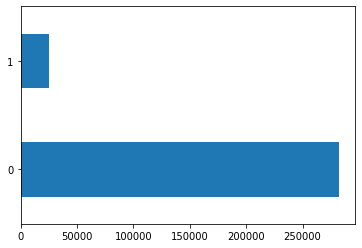

In [20]:
application_train.TARGET.value_counts().plot(kind= 'barh')

In [48]:
for i in application_train.select_dtypes(include = 'object'):
    print("---------------" + i + "--------------")
    print(" ")
    print(application_train[i].value_counts())
    print(" ")
    print("--------------------------------------")


---------------NAME_CONTRACT_TYPE--------------
 
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
 
--------------------------------------
---------------CODE_GENDER--------------
 
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
 
--------------------------------------
---------------FLAG_OWN_CAR--------------
 
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
 
--------------------------------------
---------------FLAG_OWN_REALTY--------------
 
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
 
--------------------------------------
---------------NAME_TYPE_SUITE--------------
 
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
 
--------------------------------------
---------------NAME_INCOME_TYPE--------------
 
Working         

In [62]:
(
    application_train
        .select_dtypes(include = ['float64','int64'])
        .describe()
        .transpose()
        [['count', 'mean', 'std', 'min', 'max']]        
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,count,mean,std,min,max
SK_ID_CURR,307511.0000,278180.5186,102790.1753,100002.0000,456255.0000
TARGET,307511.0000,0.0807,0.2724,0.0000,1.0000
CNT_CHILDREN,307511.0000,0.4171,0.7221,0.0000,19.0000
AMT_INCOME_TOTAL,307511.0000,168797.9193,237123.1463,25650.0000,117000000.0000
AMT_CREDIT,307511.0000,599025.9997,402490.7770,45000.0000,4050000.0000
AMT_ANNUITY,307499.0000,27108.5739,14493.7373,1615.5000,258025.5000
AMT_GOODS_PRICE,307233.0000,538396.2074,369446.4605,40500.0000,4050000.0000
REGION_POPULATION_RELATIVE,307511.0000,0.0209,0.0138,0.0003,0.0725
DAYS_BIRTH,307511.0000,-16036.9951,4363.9886,-25229.0000,-7489.0000
DAYS_EMPLOYED,307511.0000,63815.0459,141275.7665,-17912.0000,365243.0000


In [31]:
(
    application_train
        .isnull()
        .sum()
)

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

# Bureau

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

CB사에 보고된, 타 금융기관으로부터 제공받은 모든 사용자들의 이전 credits 이용 기록.
우리 샘플 내 모든 Loan 에 대한 기록에는, application dates 이전에 받은 모든 credits 관련 기록들이 있습니다. 최대한 많이요!

In [ ]:
bureau.shape

(1716428, 17)

In [ ]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


# bureau_balance

Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

In [ ]:
bureau_balance.shape

(27299925, 3)

In [ ]:
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X
